## Setup

### Import Libraries

In [239]:
%matplotlib inline

from typing import List

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from matplotlib.ticker import ScalarFormatter

In [240]:
warnings.filterwarnings("ignore")

matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 300

### Env Setup

In [67]:
ROOT_DIR = Path()
CSV_DIR = Path().joinpath("csv_generator")
CSV_RESULTS_FILE_URL = CSV_DIR.joinpath("results.csv")

print(str(CSV_RESULTS_FILE_URL))

assert CSV_RESULTS_FILE_URL.exists()
assert CSV_RESULTS_FILE_URL.is_file()

csv_generator/results.csv


## CSV Loading

In [68]:
df = pd.read_csv(CSV_RESULTS_FILE_URL)

In [69]:
df.head(15)

,technology,data_name,data_index,stats_tot_time,stats_solved,solver,model,symmetry,cumulative,search
0,CP,ins-1,1,0.060000,True,Chuffed,symmetry,True,False,None
1,CP,ins-1,1,0.050000,True,Chuffed,search,False,False,None
2,CP,ins-1,1,0.060000,True,Chuffed,search.symmetry,True,False,None
3,CP,ins-1,1,0.060000,True,Chuffed,rotation.search,False,False,None
4,CP,ins-1,1,0.050000,True,Chuffed,rotation,False,False,None
5,CP,ins-1,1,0.160000,True,Chuffed,base,False,False,None
6,SAT,ins-13,13,15.074396,True,None,rotation,False,True,binary
7,SAT,ins-12,12,66.176521,True,None,rotation,False,True,binary
8,SAT,ins-15,15,26.173610,True,None,rotation,False,True,binary
9,SAT,ins-14,14,17.794631,True,None,rotation,False,True,binary


## Utils Functions

In [126]:
def prepare_plot_data(dfs: List[pd.DataFrame]) -> list:
    data = []

    for df in dfs:
        assert df.shape[0] > 0 and df.shape[0] <= 40

    for df in dfs:
        x, y = list(range(0, 40)), []
        for ins_index in x:
            _rows = df[df.data_index == (ins_index + 1)]
            assert _rows.shape[0] < 2
            if _rows.shape[0] == 0:
                y.append(300)
            else:
                y.append(_rows.iloc[0]["stats_tot_time"])
        data.append((x, y))

    return data

In [242]:
def plot(title: str, subtitle: str, width: float, data: list, labels: List[str]) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    plt.title(title)
    fig.canvas.manager.set_window_title(subtitle)
    fig.dpi

    x_idxs = np.arange(1, 41, 1)
    for i, [_, y] in enumerate(data):
        bar = ax.bar(x_idxs+(width * i), y, width, label=labels[i], align='center')

    ax.set_xlabel("Instances")
    ax.set_ylabel("Solve Time (s)")
    ax.set_xlim(0, 41)
    ax.set_xticks(list(range(1, 41)))
    ax.set_yscale('log')
    ax.set_yticks([0.1, 1, 10, 60, 150, 300])
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    ax.grid(axis='y')
    
    ax.legend()
    plt.show()



## Plots

In [72]:
df_CP = df.copy()[df.technology == "CP"]
df_SAT = df.copy()[df.technology == "SAT"]
df_SMT = df.copy()[df.technology == "SMT"]
df_ILP = df.copy()[df.technology == "ILP"]

In [73]:
def SMT_df_filter(
    model, symmetry = False, cumulative = False, search = "linear"
) -> pd.DataFrame:
    return df_SMT.copy()[
        (df.model == model) & 
        (df.symmetry == symmetry) & 
        (df.cumulative == cumulative) &
        (df.search == search) 
    ]

### SMT

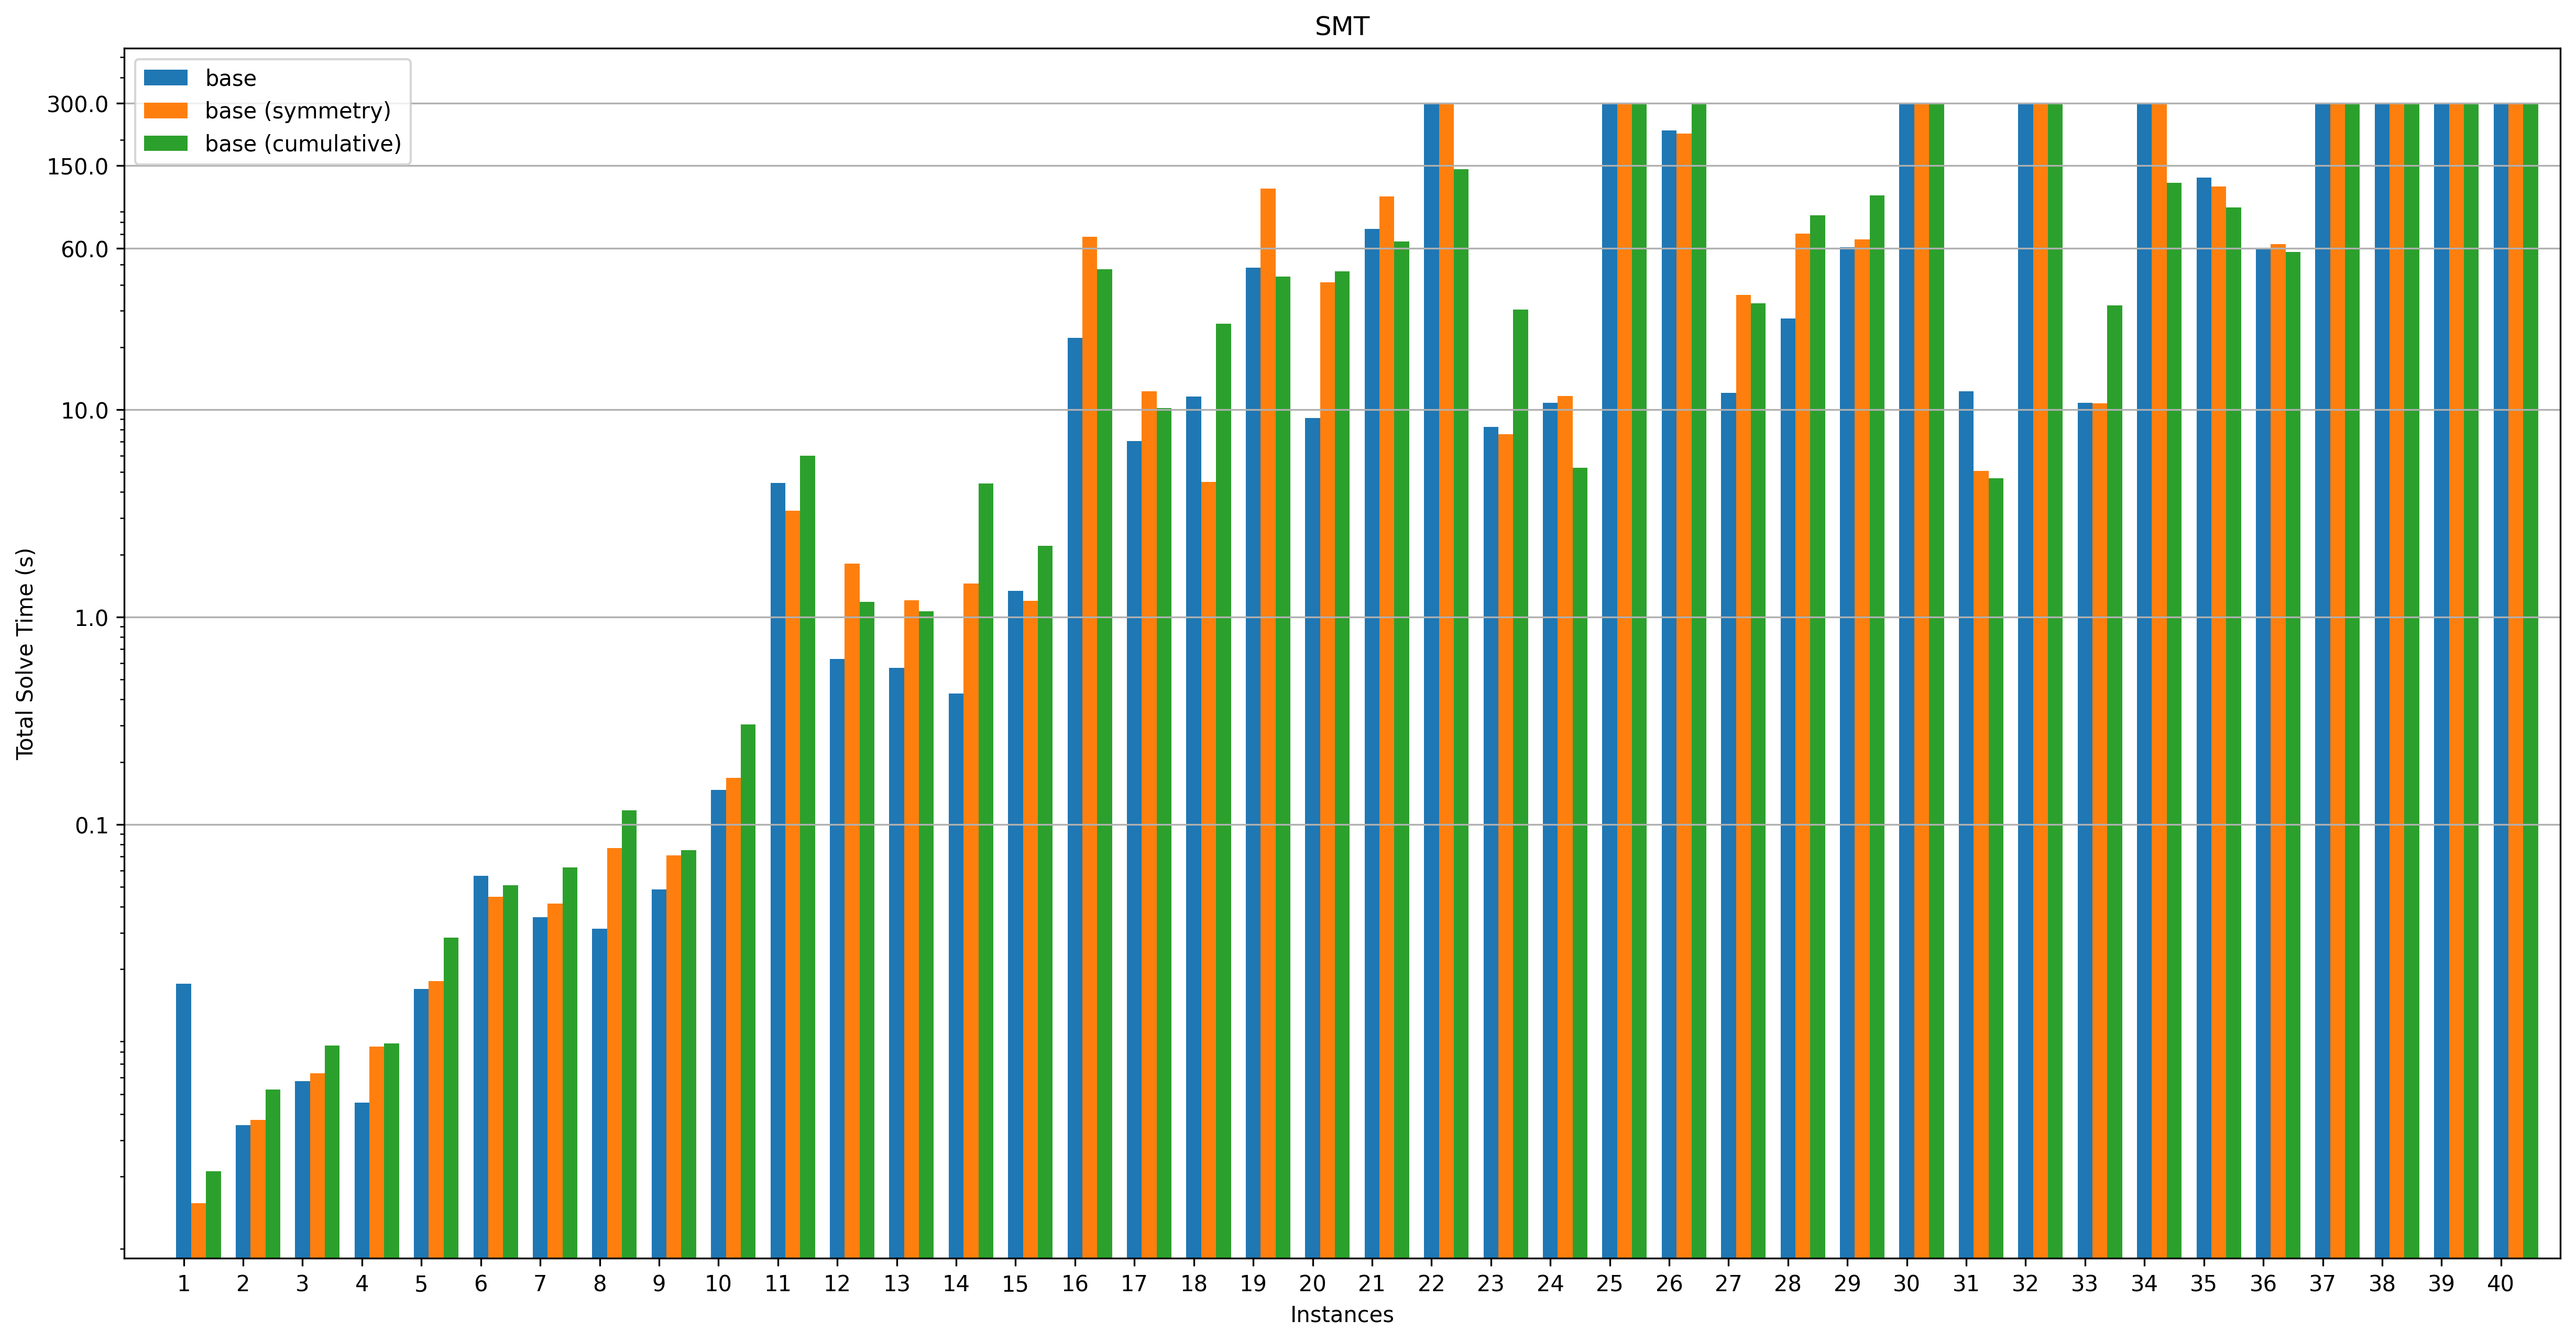

In [247]:
_tmp_dfs = [
    SMT_df_filter(model="base"),
    SMT_df_filter(model="base", symmetry=True),
    SMT_df_filter(model="base", cumulative=True),
]
width = 0.25 # lines width/padding
labels = [
    "base", 
    "base (symmetry)", 
    "base (cumulative)"
]

plot("SMT", "SMT", width, prepare_plot_data(_tmp_dfs), labels)

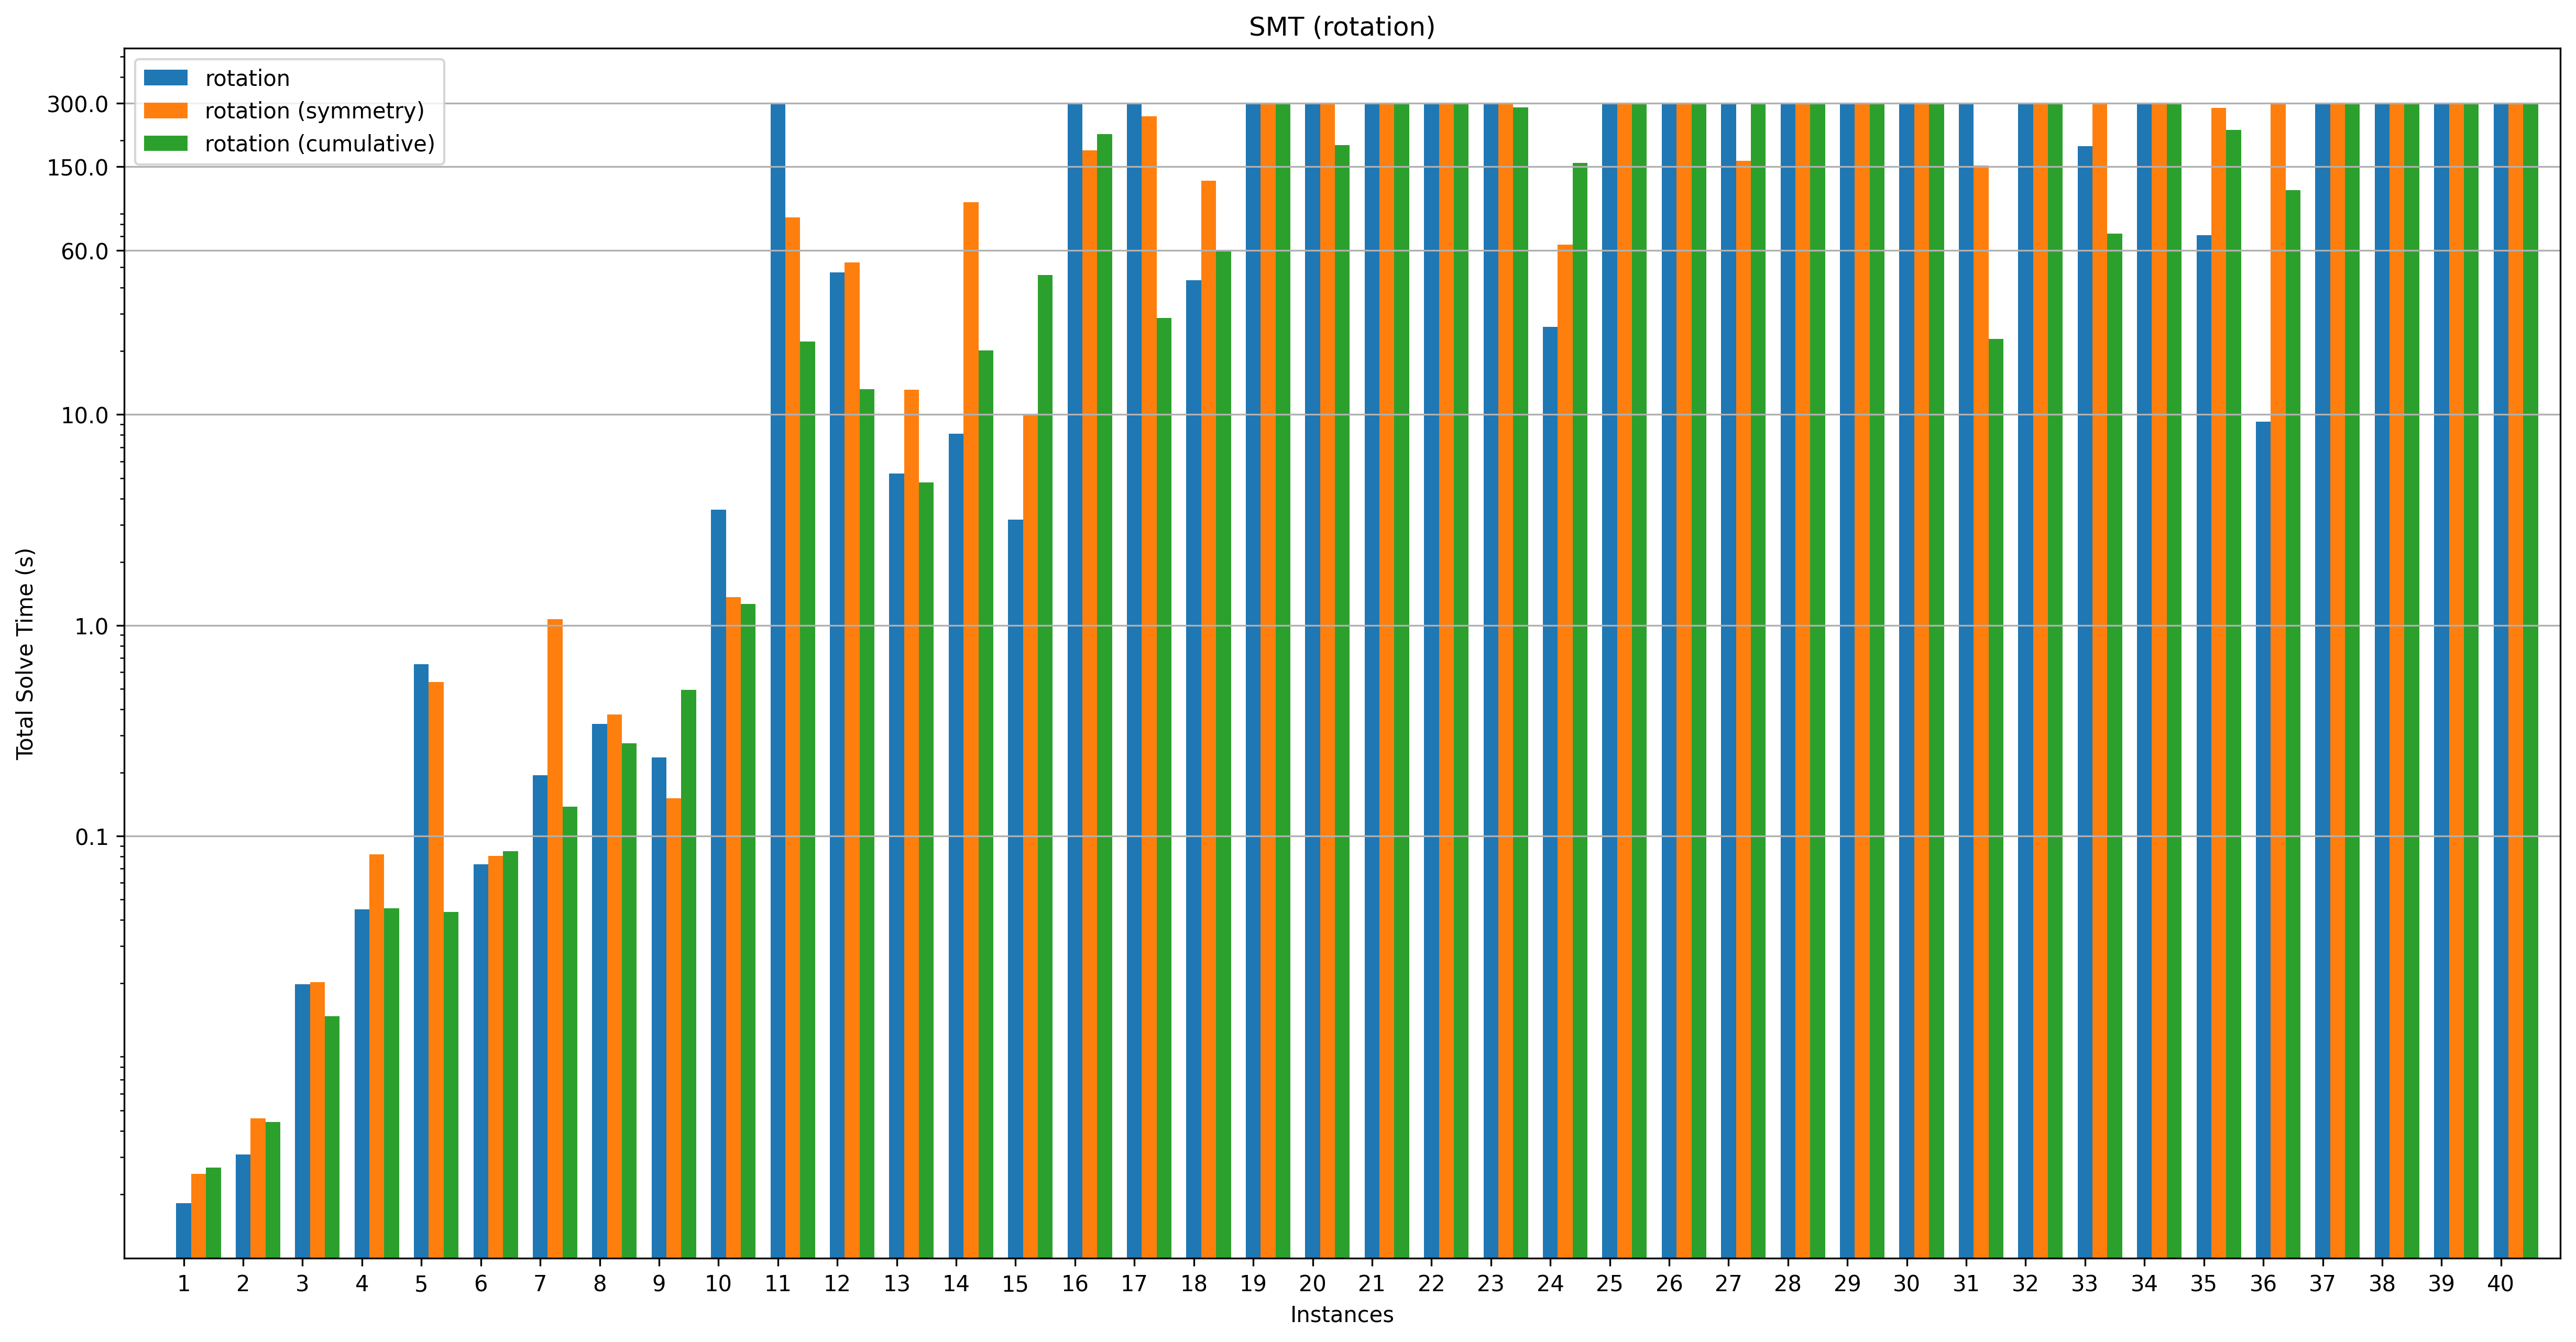

In [248]:
_tmp_dfs = [
    SMT_df_filter(model="rotation"),
    SMT_df_filter(model="rotation", symmetry=True),
    SMT_df_filter(model="rotation", cumulative=True),
]
width = 0.25 # lines width/padding
labels = [
    "rotation", 
    "rotation (symmetry)", 
    "rotation (cumulative)",
]

plot("SMT (rotation)", "SMT (rotation)", width, prepare_plot_data(_tmp_dfs), labels)